# **Heart Disease Prediction**

![image](Heart3.png)

## 1. **BUSINESS UNDERSTANDING**

### a. Introduction

Heart disease, particularly coronary artery disease (CAD), is a leading cause of morbidity and mortality worldwide. Early detection and accurate diagnosis are crucial for effective treatment and prevention of severe outcomes. Machine learning has the potential to significantly enhance the predictive accuracy for CAD, offering a powerful tool for healthcare providers. This project aims to leverage a comprehensive heart disease dataset, created by combining five well-known datasets, to develop a predictive model for CAD.

### b. Problem Statement
### **What is the prevailing Circumstance?**

Despite advances in medical technology, the early detection and diagnosis of coronary artery disease remain challenging. Traditional diagnostic methods can be time-consuming, costly, and may not always be accurate.
### **What problem is being addressed?**

The project addresses the challenge of improving the early and accurate prediction of coronary artery disease. Current diagnostic methods can be supplemented by a predictive model to provide timely and reliable insights, which are essential for early intervention and better patient outcomes.
### **How the project aims to solve the problems?**

The project aims to develop a machine learning model using a combined dataset from five established heart disease datasets. By training the model on a large and diverse dataset with 11 common features, the predictive accuracy can be enhanced. The model will help healthcare providers in identifying high-risk patients, thereby facilitating early diagnosis and personalized treatment plans.

### c. Objectives

#### Main Objectives
- To develop a machine learning model that can predict the presence of coronary artery disease based on patient data.
#### Specific Objectives
- To clean and preprocess the combined heart disease dataset ensuring data quality and consistency.
- To select and engineer features that significantly contribute to the prediction of CAD.
- To train and validate multiple machine learning models to identify the most accurate and interpretable model.
- To implement the model in a user-friendly interface for healthcare providers.
### d. Notebook Structure
i. Business Understanding <br>

ii. Data Understanding<br>

iii. Exploratory Data Analysis<br>

iv. Data Preprocessing<br>

v. Modeling<br>

vi. Evaluation<br>

vii. Conclusion<br>


### e. Stakeholders
- Healthcare Providers: Physicians, cardiologists, and healthcare professionals who will use the model to aid in diagnosis and treatment.
- Patients: Individuals at risk of or suffering from heart disease who will benefit from early and accurate diagnosis.
- Healthcare Institutions: Hospitals and clinics aiming to improve patient outcomes and optimize resource allocation.
- Researchers: Academics and professionals focused on advancing medical research and machine learning applications in healthcare.
- Insurance Companies: Organizations that can utilize predictive models to assess risk and manage patient care costs effectively.
### f. Metric of Success

- The performance of the model is evaluated based on achieving an accuracy of over 80%.
- Precision and Recall: High precision and recall to ensure reliability and minimize false positives/negatives.









### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from joblib import dump

from warnings import filterwarnings
filterwarnings(action='ignore')

### Loading the datasets

In [2]:
heart = pd.read_csv('heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Replace spaces with underscores in column names
heart.columns = [col.replace(' ', '_') for col in heart.columns]
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# check shape of the datasets
heart.shape

(303, 14)

In [5]:
#check info of the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Description of the data
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Data Cleaning

In [7]:
# Checking the column names  in the dataset
print("Column names of  dataset:")
print(list(heart.columns))

Column names of  dataset:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [8]:
# Check for duplicates
heart.duplicated().sum()

1

In [9]:
# View duplicate rows
duplicates = heart[heart.duplicated()]
print(duplicates)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [10]:
# Drop duplicate rows
heart.drop_duplicates(inplace=True)

# Check the number of duplicates after dropping
print("Number of duplicates after dropping:", heart.duplicated().sum())



Number of duplicates after dropping: 0


In [11]:
# Check for missing values
heart.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- This shows the datasets has no missing values

## 3. Exploratory Data Analysis

In [12]:
# Check how many classes are there.
heart["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

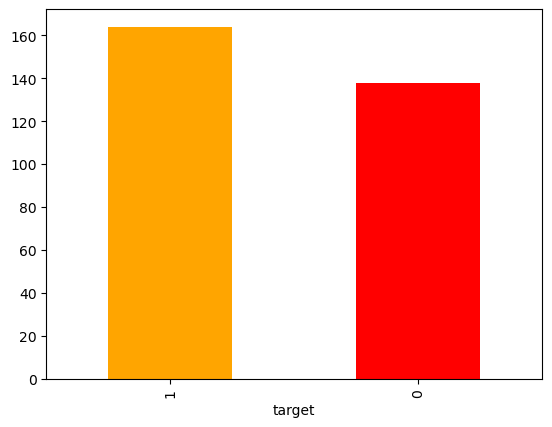

In [13]:
heart["target"].value_counts().plot(kind="bar", color=["orange", "red"]);

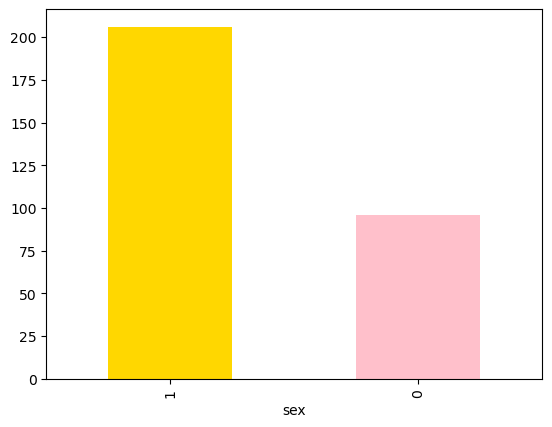

In [14]:
heart.sex.value_counts()
heart["sex"].value_counts().plot(kind="bar", color=["Gold", "Pink"]);

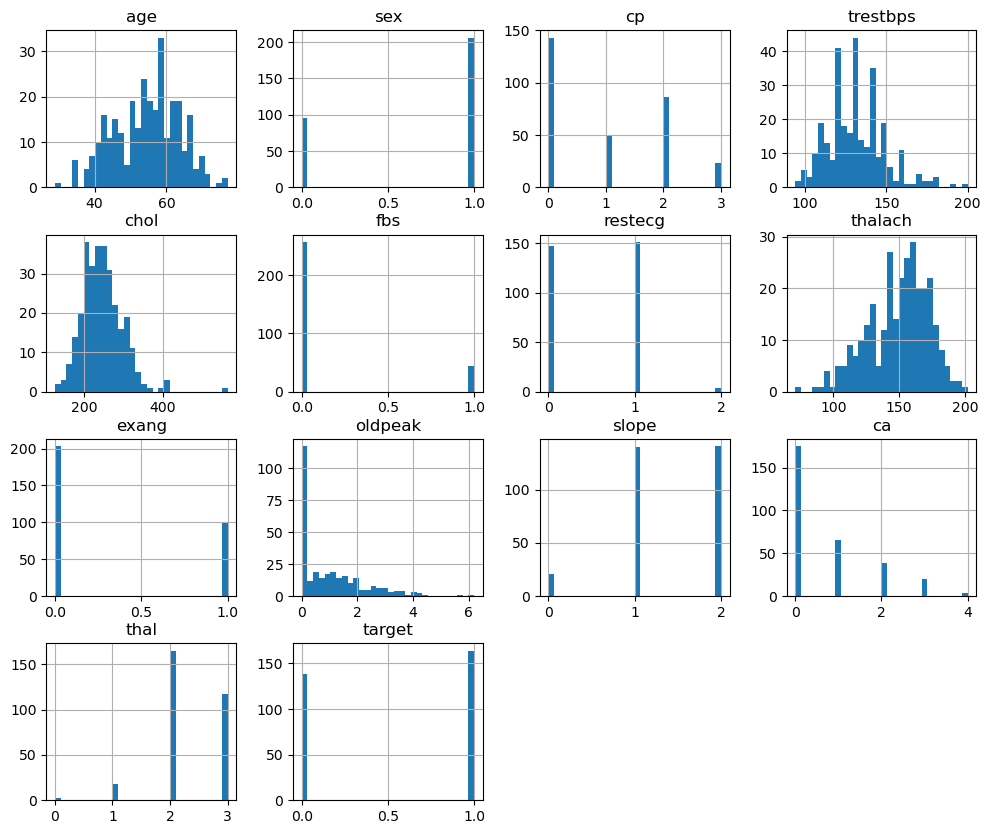

In [15]:
# Plot histograms for all numerical columns
heart.hist(bins=30, figsize=(12, 10))
plt.show()

#### Age Distribution

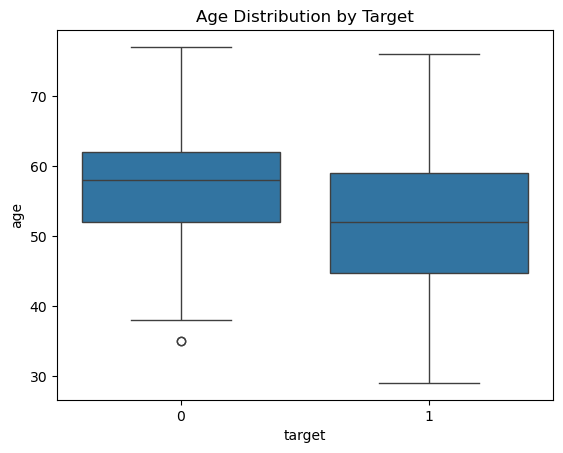

In [16]:
sns.boxplot(x='target', y='age', data=heart)
plt.title('Age Distribution by Target')
plt.show()

#### Sex Distribution

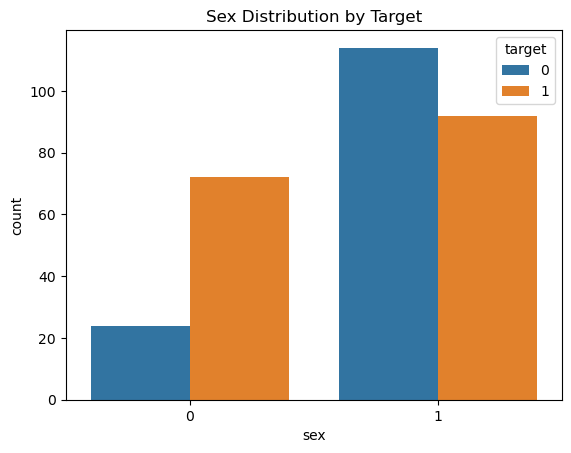

In [17]:
sns.countplot(x='sex', hue='target', data=heart)
plt.title('Sex Distribution by Target')
plt.show()


## Data Preprocessing

### Handling class imbalance

In [18]:


# Separate features and target variable
X = heart.drop('target', axis=1)
y = heart['target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame if needed
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='target')

# Check the new class distribution
print(y_resampled.value_counts())


target
1    164
0    164
Name: count, dtype: int64


## Modelling

### Logistic Regression

In [19]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))






Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.85      0.82      0.84        34

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



### Random Forest

In [20]:


# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8181818181818182

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.79      0.88      0.83        34

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



### XG Boost

In [21]:

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.803030303030303

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.82      0.79      0.81        34

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66



### Hyperparameter tuning for logistic regression

In [22]:


# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization penalty
    'solver': ['liblinear', 'saga']       # Algorithm to use in optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Use best estimator from grid search
best_lr_model = grid_search.best_estimator_


# Make predictions
y_pred_lr_tuned = best_lr_model.predict(X_test)

# Evaluate model performance
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("\nTuned Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tuned))
print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_tuned))




Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.8511611030478955
Tuned Logistic Regression Accuracy: 0.8181818181818182

Tuned Logistic Regression Confusion Matrix:
[[27  5]
 [ 7 27]]

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.84      0.79      0.82        34

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



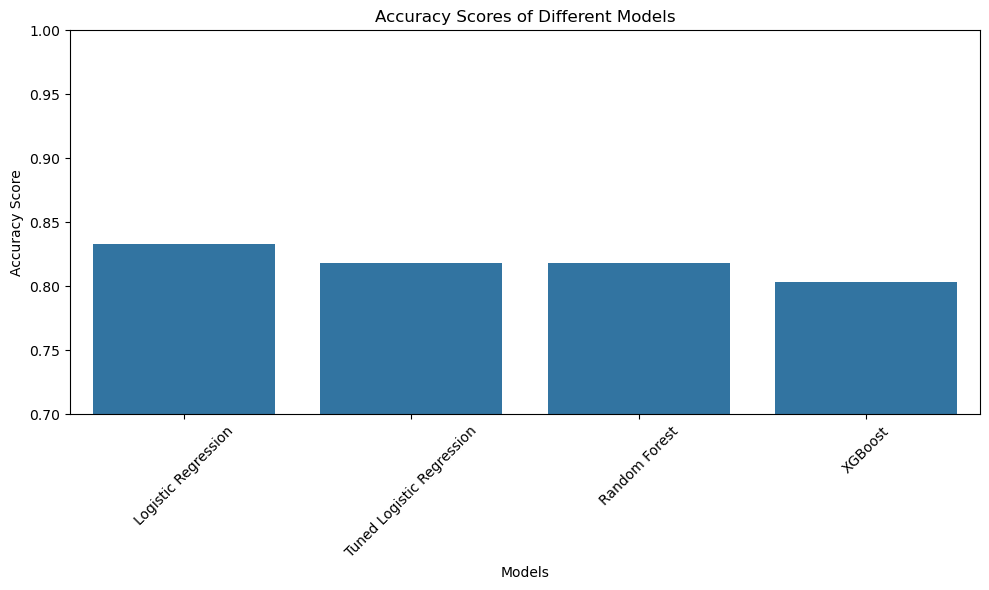

In [23]:
# A plot to show the best Models in terms of its accuracy

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Tuned Logistic Regression': LogisticRegression(C=100, penalty='l1', solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.7, 1.0])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Minimum Viable Product

- Logistic Regression stands out as the optimal model for predicting heart disease with high accuracy 83.33%. 
- It enables precise identification of individuals at risk, facilitating proactive health management and personalized interventions. 
- By analyzing key health indicators, Logistic Regression supports early detection and risk stratification, leading to improved patient outcomes and efficient healthcare resource allocation. 
- Its robust predictive capabilities contribute to reducing healthcare costs and enhancing public health by preventing advanced disease progression.

### Saving the Model

In [24]:


#  save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to disk
dump(model, model_file_path)

print(f"Trained model saved as {model_file_path}")


Trained model saved as logistic_regression_model.pkl
